# 35일차
## 이미지 처리 딥러닝

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## 폴더에서 이미지 가져오기
- https://www.tensorflow.org/tutorials/load_data/images 소스 참고
- f:\datasets\flower_photos.tgz
>- daisy(633장)
>- dandelion(898장)
>- roses(641장)
>- sunflowers(699장)
>- tulips(799장)

In [30]:
data_dir = keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                               fname='flower_photos', untar=True)

228818944/228813984 [==============================] - 10s 0us/step


In [31]:
import os
files = os.listdir('C:\\Users\\hanhe\\.keras\\datasets\\flower_photos\\daisy')
files

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '102841525_bd6628ae3c.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437770546_8bb6f7bdd3_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10555826524_423eb8bf71_n.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993710036_2033222c91.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0cd.jpg',
 '1150395827_6f94a5c6e4_n

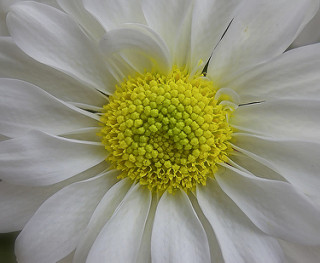

In [32]:
import PIL
PIL.Image.open('C:\\Users\\hanhe\\.keras\\datasets\\flower_photos\\daisy\\' + files[0])

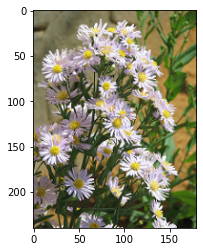

In [33]:
image = plt.imread('C:\\Users\\hanhe\\.keras\\datasets\\flower_photos\\daisy\\' + files[-1])
plt.imshow(image)

### 개와 고양이

### 데이터 불러오기

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [6]:
train_generator

In [7]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 100, 100, 3) (20,)
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]


In [8]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((100, 100, 3), dtype('float32'), 0.9960785, 0.0)

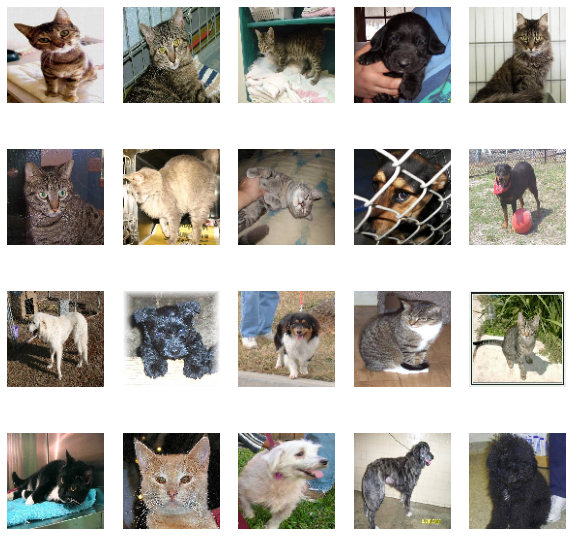

In [9]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [13]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


### CNN 적용

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(100,100,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)      

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
history = model.fit_generator(train_generator, epochs=5, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 31s 308ms/step - loss: 0.7706 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/5
100/100 [==============================] - 26s 256ms/step - loss: 0.6937 - acc: 0.5080 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 3/5
100/100 [==============================] - 27s 266ms/step - loss: 0.6942 - acc: 0.5086 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/5
100/100 [==============================] - 28s 283ms/step - loss: 0.6935 - acc: 0.4918 - val_loss: 0.6925 - val_acc: 0.4990
Epoch 5/5
100/100 [==============================] - 29s 292ms/step - loss: 0.6941 - acc: 0.5219 - val_loss: 0.6894 - val_acc: 0.5000


In [20]:
history2 = model.fit_generator(train_generator, epochs=10, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 23s 232ms/step - loss: 0.6897 - acc: 0.5335 - val_loss: 0.6849 - val_acc: 0.5980
Epoch 2/10
100/100 [==============================] - 26s 261ms/step - loss: 0.6882 - acc: 0.5400 - val_loss: 0.6797 - val_acc: 0.5690
Epoch 3/10
100/100 [==============================] - 27s 270ms/step - loss: 0.6847 - acc: 0.5310 - val_loss: 0.6796 - val_acc: 0.5590
Epoch 4/10
100/100 [==============================] - 29s 294ms/step - loss: 0.6871 - acc: 0.5655 - val_loss: 0.6827 - val_acc: 0.5450
Epoch 5/10
100/100 [==============================] - 29s 295ms/step - loss: 0.6788 - acc: 0.5750 - val_loss: 0.6824 - val_acc: 0.5090
Epoch 6/10
100/100 [==============================] - 29s 295ms/step - loss: 0.6806 - acc: 0.5645 - val_loss: 0.6772 - val_acc: 0.5820
Epoch 7/10
100/100 [==============================] - 29s 295ms/step - loss: 0.6696 - acc: 0.6030 - val_loss: 0.6988 - val_acc: 0.5120
Epoch 8/10
100/100 [==============================] - 3

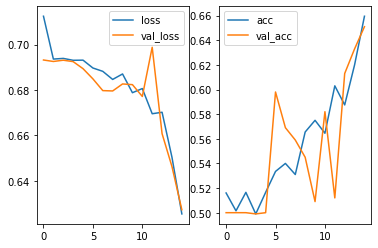

In [21]:
plt.subplot(1,2,1)
plt.plot(history.history['loss']+history2.history['loss'])
plt.plot(history.history['val_loss']+history2.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc']+history2.history['acc'])
plt.plot(history.history['val_acc']+history2.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [22]:
model.save('cats_and_dogs_model_1.h5')  # creates a HDF5 file

### Image Augmentation

In [23]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

In [24]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [25]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 150, 150, 3) (20,)
[1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.]


In [26]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((150, 150, 3), dtype('float32'), 1.0, 0.0)

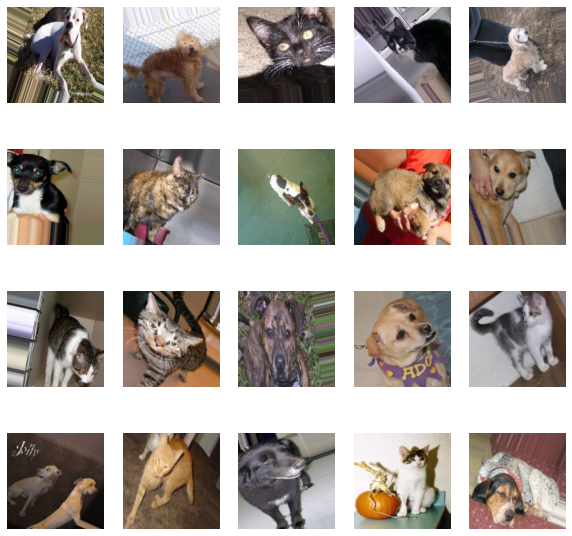

In [27]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [28]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.
